# 作业一 数据探索性分析与数据预处理

# 数据集：wine-reviews

## 代码地址：https://github.com/lijie0610/data_mining/tree/data_analysis

# 0 数据准备及查看

In [1]:
#导入包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math


## 查看数据集

以winemag-data_first150k.csv为例

In [2]:
#读取数据集
data = pd.read_csv('D:/Users/Desktop/data/Wine Reviews/winemag-data_first150k.csv',index_col=0)
data.head()#数据展示

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


wine表共含有10个字段，分别解释为：<br>
country：产出国<br>
description：葡萄酒描述<br>
designation：酿造葡萄酒的葡萄来自葡萄园<br>
points：葡萄酒评分<br>
price：葡萄酒成本<br>
province：产出省<br>
region_1：产出区域1<br>
region_2：产出区域2<br>
variety：用于酿造葡萄酒的葡萄种类<br>
winery：生产葡萄酒的酿酒厂

In [3]:
data.shape #数据集的大小

(150930, 10)

winemag-data_first150k.csv包含10列和15万行葡萄酒评论。

# 1 数据可视化和摘要



## 1.1 数据摘要
### 标称属性，给出每个可能聚会的频数

标称属性有'country','designation','province','region_1','region_2'<br>
统计每个属性的频数

In [4]:
pd.value_counts(data['country'])#country

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [5]:
pd.value_counts(data['designation'])#designation

Reserve                2752
Reserva                1810
Estate                 1571
Barrel sample          1326
Riserva                 754
                       ... 
The Mayor                 1
Alba in Vigna             1
Lodi Estates              1
Punta Esencia             1
le Mistral Vineyard       1
Name: designation, Length: 30621, dtype: int64

In [6]:
pd.value_counts(data['province'])#province

California        44508
Washington         9750
Tuscany            7281
Bordeaux           6111
Northern Spain     4892
                  ...  
Limnos                1
Langenlois            1
Douro Superior        1
Ilia                  1
Neuchâtel             1
Name: province, Length: 455, dtype: int64

In [7]:
pd.value_counts(data['region_1'])#region_1

Napa Valley                             6209
Columbia Valley (WA)                    4975
Mendoza                                 3586
Russian River Valley                    3571
California                              3462
                                        ... 
Asolo Prosecco Superiore                   1
Langhorne Creek-Limestone Coast            1
Bourgogne Vézelay                          1
Vin de Pays des Coteaux de L'Ardeche       1
Musigny                                    1
Name: region_1, Length: 1236, dtype: int64

In [8]:
pd.value_counts(data['region_2'])#region_2

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [9]:
pd.value_counts(data['variety'])#variety

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Moscofilero                     1
Huxelrebe                       1
Pinela                          1
Parraleta                       1
Pinotage-Merlot                 1
Name: variety, Length: 632, dtype: int64

In [10]:
pd.value_counts(data['winery'])#winery

Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
Columbia Crest                  217
                               ... 
Tenuta Ponte                      1
Château la Grande Barthe          1
Domaine Guy & Yvan Dufouleur      1
Marco Porello                     1
Château Castelbruck               1
Name: winery, Length: 14810, dtype: int64

### 数值属性，给出5数概括及缺失值的个数

数值属性包括points和price<br>
分别给出5数概括

In [11]:
data['points'].describe()#points5数概括

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [12]:
data['price'].describe()#price5数概括

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

分别给出缺失值个数

In [13]:
data['points'].isnull().sum()#points缺失值个数

0

In [14]:
data['price'].isnull().sum()#price缺失值个数

13695

数据摘要可以看出，美国是葡萄酒的主要出产国，主要来自的省份是California，葡萄种类以Chardonnay，Pinot Noir，Cabernet Sauvignon，Red Blend为主，葡萄酒的平均评分为87.89，平均成本为33.13

## 1.2 数据可视化
### 使用直方图、盒图，qq图检查数据分布及离群点

分别绘制points和price的直方图、盒图，qq图

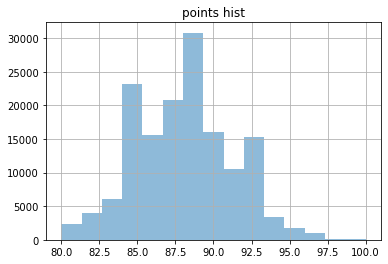

In [15]:
#points直方图
plt.title("points hist")
data['points'].hist(alpha=0.5,bins=15)

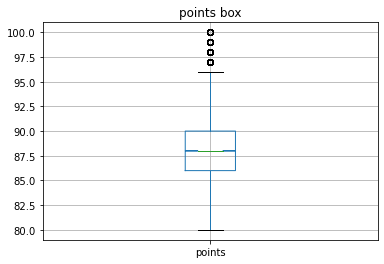

In [16]:
#points盒图
plt.title("points box")
data['points'].plot(kind='box',notch=True,grid=True)

((array([-4.43552085, -4.24057241, -4.13467201, ...,  4.13467201,
          4.24057241,  4.43552085]),
  array([ 80,  80,  80, ..., 100, 100, 100], dtype=int64)),
 (3.203849125317321, 87.8884184721394, 0.9942191427994859))

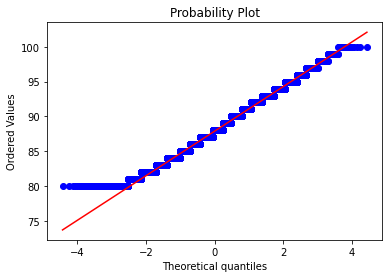

In [17]:
#points q-q图
stats.probplot(data['points'],dist="norm",plot=plt)

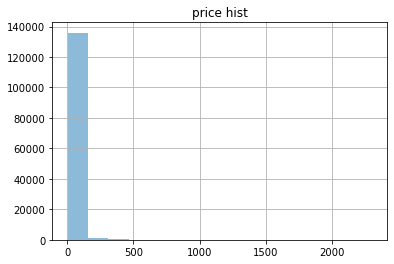

In [18]:
#price直方图
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15)

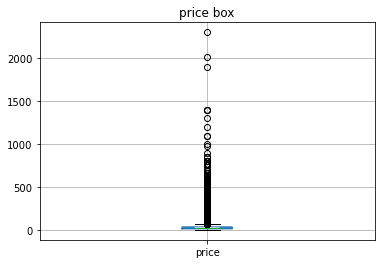

In [19]:
#price盒图
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((array([-4.43552085, -4.24057241, -4.13467201, ...,  4.13467201,
          4.24057241,  4.43552085]),
  array([ 4.,  4.,  4., ..., nan, nan, nan])),
 (nan, nan, nan))

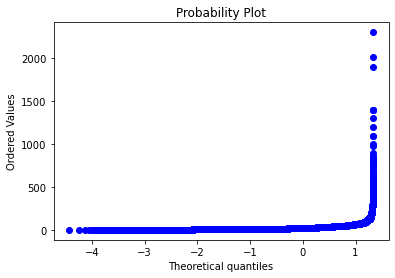

In [20]:
#priceqq图
stats.probplot(data['price'],dist="norm",plot=plt)

points分布较为分散，符合正态分布<br>
price数据分布比较集中，但存在大量的离群点，

# 2 数据缺失处理

country，designation,province,region_1,region_2，price存在缺失值<br>
缺失的原因可能是由于未及时记录，无法追溯<br>
这里对price数据进行缺失值处理

## 2.1 缺失值剔除

直接把缺失值删除

In [21]:
new_price_data1 = data['price'].copy(deep=True)
new_price_data1= new_price_data1.dropna()

In [22]:
new_price_data1.isnull().sum()

0

### 可视化地对比新旧数据集

In [23]:
def drawhist(new_data):
    #直方图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    plt.title("price hist")
    data['price'].hist(alpha=0.5,bins=15)

    plt.subplot(1,2,2)
    plt.title("new price hist")
    new_data.hist(alpha=0.5,bins=15) 

In [24]:
def drawbox(new_data):
    #盒图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    plt.title("price box")
    data['price'].plot(kind='box',notch=True,grid=True)

    plt.subplot(1,2,2)
    plt.title("new price box")
    new_data.plot(kind='box',notch=True,grid=True)

In [25]:
def drawqq(new_data):
    #q-q图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    stats.probplot(data['price'],dist="norm",plot=plt)

    plt.subplot(1,2,2)
    stats.probplot(new_data,dist="norm",plot=plt)

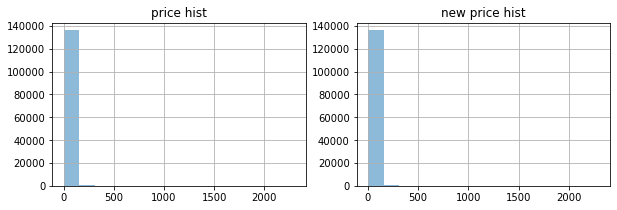

In [26]:
drawhist(new_price_data1)

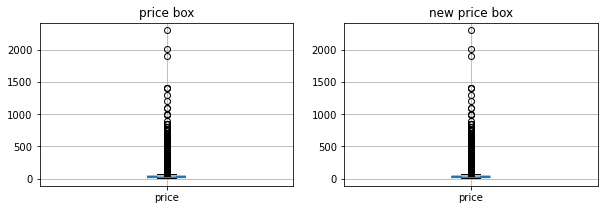

In [27]:
drawbox(new_price_data1)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


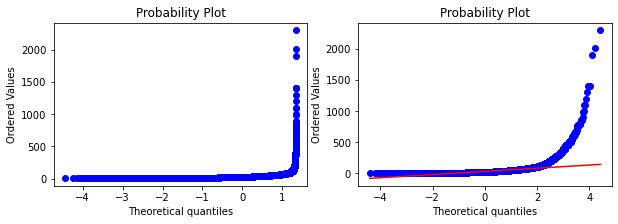

In [28]:
drawqq(new_price_data1)

In [29]:
new_price_data1.describe()  #数据统计

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

## 2.2 用最高频率值来填补缺失值

使用最高频率值，即众数来填补缺失值。

In [30]:
new_price_data2 = data['price'].copy(deep=True)
price_mode = Counter(new_price_data2).most_common(1)[0][0]
new_price_data2 = new_price_data2.fillna(price_mode)

In [31]:
new_price_data2.isnull().sum()

0

### 可视化对比新旧数据

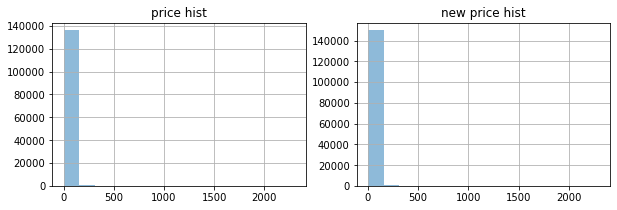

In [32]:
drawhist(new_price_data2)

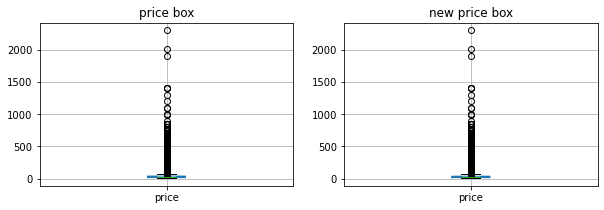

In [33]:
drawbox(new_price_data2)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


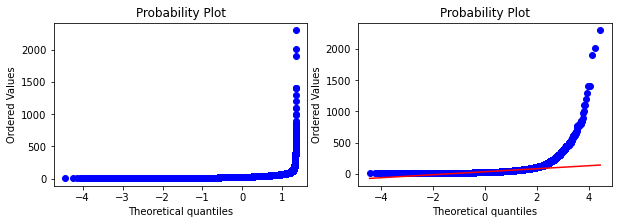

In [34]:
drawqq(new_price_data2)

In [35]:
new_price_data2.describe()#数据描述

count    150930.000000
mean         31.939966
std          34.840211
min           4.000000
25%          16.000000
50%          22.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64

## 2.3 通过属性的相关关系来填补缺失值

探寻变量之间的相关关系，找到相关性较高的两个变量后，再寻找他们之间的线性回归关系，最后通过线性回归关系计算缺失值进行填补。

查看属性的相关关系

In [36]:
data.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


可见points与price具有相关性，建立线性预测模型来预测缺失值

In [37]:
import tqdm

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
new_data = data.dropna(subset=['price'])
x = new_data['points']
y = new_data['price']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
new_price_data3 = data['price'].copy(deep=True)
new_points_data = data['points'].copy(deep=True)
i=0
for _,value in new_price_data3.iteritems():
    if new_price_data3.isnull()[i]==True:
        new_price_data3[i] = model.predict(np.array(new_points_data[i]).reshape(-1, 1))
    i=i+1

In [40]:
new_price_data3.isnull().sum()

0

In [41]:
new_price_data3.describe()

count    150930.000000
mean         33.652543
std          35.000758
min          -7.246443
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

### 可视化对比新旧数据集

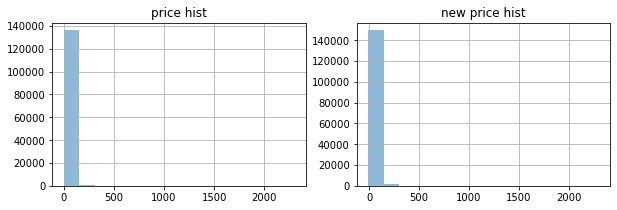

In [42]:
drawhist(new_price_data3)

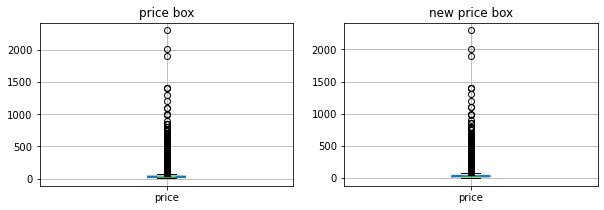

In [43]:
drawbox(new_price_data3)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


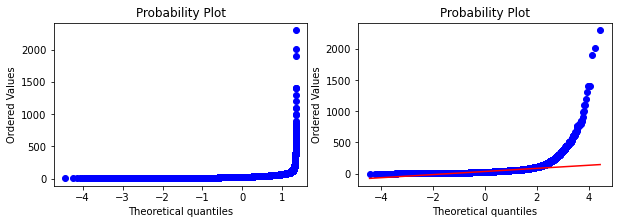

In [44]:
drawqq(new_price_data3)

## 2.4 通过对象的相似性填补缺失值

通过数据对象之间的相似性来填补缺失值

In [45]:
other_data = data[data['price'].notna()]
new_data4 = data.copy(deep=True)
consider_fields = ['variety', 'winery', 'designation', 'region_1', 'province']
for i, row in tqdm.tqdm(list(new_data4[data['price'].isna()].iterrows())):
    for field in consider_fields:
        resemble_data = other_data[other_data[field]==row[field]]
        new_data4['price'][i] = resemble_data['price'].mean()
        break

  0%|                                                                                        | 0/13695 [00:00<?, ?it/s]<ipython-input-45-8df4d605d0c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data4['price'][i] = resemble_data['price'].mean()
100%|████████████████████████████████████████████████████████████████████████████| 13695/13695 [03:48<00:00, 59.95it/s]


### 可视化对比新旧数据集

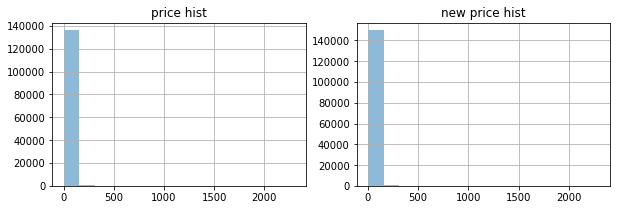

In [46]:
drawhist(new_data4['price'])

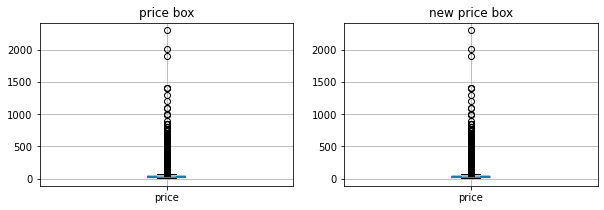

In [47]:
drawbox(new_data4['price'])

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


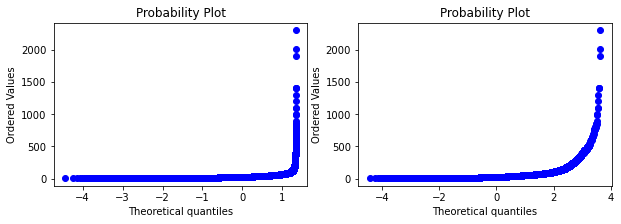

In [48]:
drawqq(new_data4['price'])

In [49]:
new_data4['price'].describe()#数据描述

count    150909.000000
mean         33.543125
std          34.950161
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64